## Sorting algorythms fighting each other

In [4]:
row = 'sphynx of black quartz, judge my vow!'

### Insert sort

In [5]:
def ns(a, n_changes=None):
    if len(a)<=1: return a
    count = 0
    for i in range(1,len(a)):
        j = i
        while a[j]<a[j-1] and j>=1:
            a[j-1],a[j] = a[j],a[j-1]
            count += 1
            if n_changes and count >= n_changes:
                return a # Early termination
            j -= 1
    return a

ns([1,4,3,5,2], 2)

[1, 3, 4, 2, 5]

### Select sort

In [6]:
def ss(a):
    for i in range(len(a)):
        m = a[i]           # Current minimum
        c = i
        for j in range(i+1,len(a)):
            if a[j]<m:     # Find smallest element
                m = a[j]
                c = j                
        if c>i:
            (a[i],a[c]) = (a[c],a[i])
    return a

''.join(ss(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

### Quicksort

In [7]:
def qs(a, n_changes=None, verbose=False):
    if len(a)<=1:  return a
    queue = [(0, len(a))] # Queue of sort-brackets; each of them a tuple
    swap_counter = 0
    while queue:
        # print(queue)
        leftest, rightest = queue.pop(0)           # Limits for sorting, with simple names
        if (rightest-leftest)<3:   p = rightest-1  # Last element will be our pivot element
        else:                           # smart pivot: best (middlest) of three values
            m = leftest + (rightest-leftest) // 2               # Median position
            if a[leftest]<=a[m] and a[m]<=a[rightest-1]:          p = m
            if a[leftest]<=a[rightest-1] and a[rightest-1]<=a[m]: p = rightest-1
            else:                                                 p = leftest
        if verbose: print(f"Search: {[leftest, p , rightest]}")
        pivot_value = a[p] # For tracking, below
        if p < rightest-1:
            a[p],a[rightest-1] = a[rightest-1],a[p]    # Hide pivot element at the end
            if verbose: 
                print(f"Hide pivot from {p}")
                print(a)

        l = leftest                         # pointer to where small values will be shoved
        for r in range(leftest,rightest-1): # For each non-pivot
            if a[r]<a[rightest-1]:          # If smaller than pivot,
                if r>l:             # and is located on the right from the running border
                    (a[r],a[l]) = (a[l],a[r]) # Swap (shove it to the left)
                    swap_counter += 1
                    if verbose:
                        print(f"Swap {(l,r)}")
                        print(a)
                l += 1              # Shift the running border
                if swap_counter >= n_changes:
                    break       # Cannot return yet - need put the pivot back

        # By the end of this, all a<pivot are in locations<l
        # and all a>pivot (if any) are in l to n-1    
        (a[l],a[rightest-1]) = (a[rightest-1],a[l]) # Set former pivot as a separator between halves        
        if verbose:
            print(f"Store former pivot at {l}")
            print(a)
        if a[l] != pivot_value:                  # If pivot moved, it counts as a swap
            swap_counter += 1        
        if swap_counter >= n_changes:
            return a                # Now can eject
        
        # Instead of recursion, put left and right searches on the stack
        if l-leftest >= 2:
            queue.append((leftest, l))
        if rightest-(l+1) >= 2:
            queue.append((l+1, rightest))        
    return a

#qs([6,1,4,7,3,5,2], 6, verbose=True)
#qs([4,4,3,5,5,6,5], 20, verbose=True)
qs([0,2,1,4,4], 20, verbose=True)

Search: [0, 0, 5]
Hide pivot from 0
[4, 2, 1, 4, 0]
Store former pivot at 0
[0, 2, 1, 4, 4]
Search: [1, 4, 5]
Store former pivot at 3
[0, 2, 1, 4, 4]
Search: [1, 2, 3]
Store former pivot at 1
[0, 1, 2, 4, 4]


[0, 1, 2, 4, 4]

As it can be seen from an example above, `n_changes` doesn't quite work right now, as swapping pivot, then swapping it to a new place can actually lead to a cyclical shift if other elements were touched... It still puts a limit on the number of operations, but it may be off.

Still, counting original pivot-swapping as a legit swap is probably incorrect as well, as on its own (without a back-swap) it doesn't necessarily improve the swappennes of the array. So not sure what to do.

In [8]:
qs([6,1,4,7,3,5,2], 1000)

[1, 2, 3, 4, 5, 6, 7]

### Mergesort

In [9]:
def ms(a):
    """A not-in-place version of mergesort.
    To make it in-place, instead of appending to o, add another counter,
    and copy right into a."""
    if len(a)<=1:
        return a
    mid = len(a) // 2
    al = ms(a[:mid])
    ar = ms(a[mid:])
    i = j = 0
    o = []
    while (i<len(al)) or (j<len(ar)):
        if i>=mid:           # Left array is over, draw from the right
            o.append(ar[j])
            j += 1
        elif j>=len(ar):     # Right array is over, draf from the left
            o.append(al[i])
            i += 1
        elif al[i]<ar[j]:    # Both are fine: compare
            o.append(al[i])
            i += 1
        else:
            o.append(ar[j])
            j += 1
    return o
    
''.join(ms(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

-----------------

# Simple visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.atleast_2d([1,2,3]).shape

(1, 3)

In [13]:
def concat(a,b):
    '''Simple concatenation of 1D into 2D.'''
    a = np.atleast_2d(a)
    b = np.atleast_2d(b)    
    if a.size == 0:
        return b # 2D row    
    return np.concatenate((a, b), axis=0)

a = concat([], [1,2,3])
print(a)
concat(a, [4,5,6])

[[1 2 3]]


array([[1, 2, 3],
       [4, 5, 6]])

134 steps
[ 2  3  4  5  6  8  9 10 11 12 12 12 13 13 14 15 15 15 16 16 17 18 18 19
 19 19 20 20 21 22 22 22 25 28 28 28 31 32 33 34 36 38 38 38 39 42 42 42
 45 46 46 47 48 48 50 52 52 56 57 57 57 58 59 60 60 60 64 65 66 67 67 68
 68 69 70 72 74 75 75 76 77 77 84 85 86 87 87 88 91 91 92 93 94 96 96 96
 97 98 98 99]


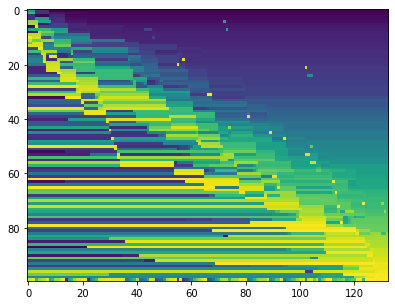

In [50]:
import matplotlib.pyplot as plt
import time
import numpy as np

# Options for sorting functions: ss, ms, qs, ns
f = qs
n_elements = 100


row = np.random.randint(n_elements, size=n_elements)
history = []
count = 0
while True:
    old_row = row.copy() # Most sorts work in-place, so have to be careful here
    row = qs(row, 3)
    #row = -ns(-row, 2)
    if np.random.randint(10)==0:
        i1 = np.random.randint(n_elements)
        i2 = np.random.randint(n_elements)
        row[i1], row[i2] = row[i2], row[i1]
    count += 1
    if (old_row == row).all():        
        print(f"{count} steps")        
        break
    history = concat(history, row)    
    
print(row)
plt.figure(figsize=(14,5));
#plt.imshow(history.T, aspect='auto');
plt.imshow(history.T);